In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

/home/hyin/anaconda3/envs/BBB/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hyin/anaconda3/envs/BBB/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hyin/anaconda3/envs/BBB/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hyin/anaconda3/envs/BBB/lib/python3.6/site-packages/ten

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [9]:
## Test model
# PATH_TO_GRAPH = r'models/ssd_udacity/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'final_models/ssd_inc_v2_sim_finetune/frozen_inference_graph.pb'
PATH_TO_GRAPH = r'final_models/ssd_inc_v2_real_finetune/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'final_data/udacity_label_map.pbtxt'
NUM_CLASSES = 3

In [10]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [11]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)


{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}}


In [15]:
IMAGE_SIZE = (12, 8)

SCORES
[9.5874894e-01 5.5584311e-04 3.7387013e-04 3.3345819e-04 3.0630827e-04
 2.7829409e-04 2.5844574e-04 2.5680661e-04 2.4935603e-04 2.3746490e-04]
CLASSES
[1. 1. 1. 1. 1. 1. 1. 2. 3. 2.]


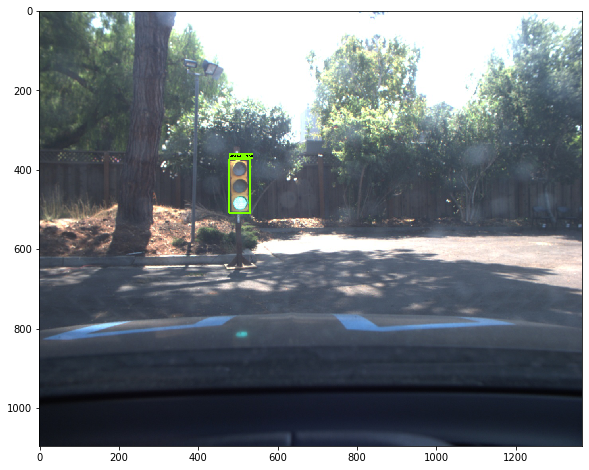

SCORES
[9.9749130e-01 1.5540123e-03 1.1738837e-03 4.4360757e-04 2.7185678e-04
 2.6059151e-04 2.4241209e-04 2.3669004e-04 2.3365021e-04 2.3186207e-04]
CLASSES
[1. 1. 2. 1. 2. 2. 3. 1. 2. 3.]


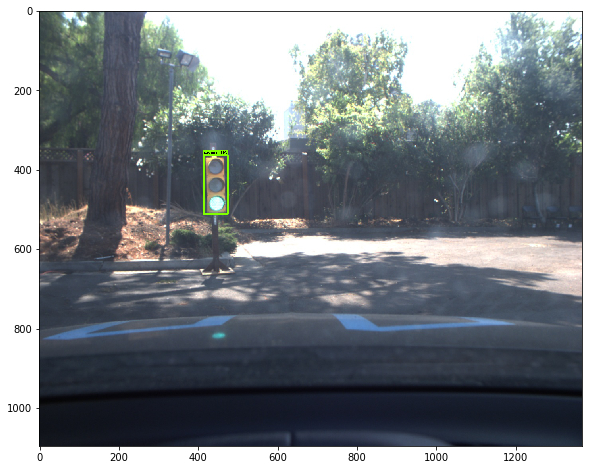

SCORES
[9.9281257e-01 2.5551915e-03 1.3518333e-03 3.5291910e-04 3.3593178e-04
 3.1235814e-04 2.3797154e-04 2.3499131e-04 1.9860268e-04 1.9672513e-04]
CLASSES
[2. 2. 1. 2. 2. 2. 2. 3. 1. 1.]


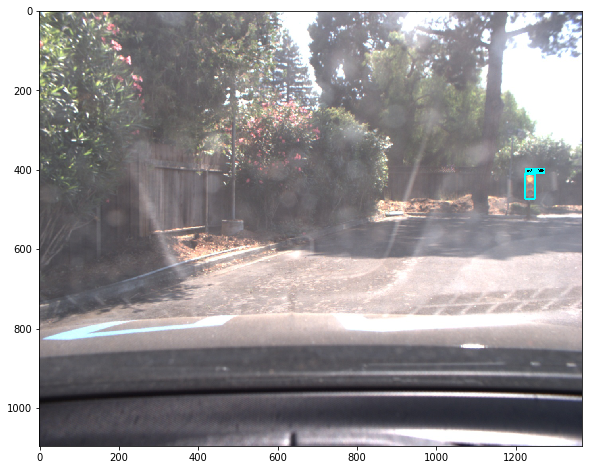

SCORES
[9.9959695e-01 2.7364492e-04 2.5993586e-04 2.4521351e-04 2.2017956e-04
 2.0182133e-04 2.0062923e-04 1.9866228e-04 1.7437339e-04 1.7222762e-04]
CLASSES
[1. 2. 2. 2. 3. 3. 2. 2. 1. 1.]


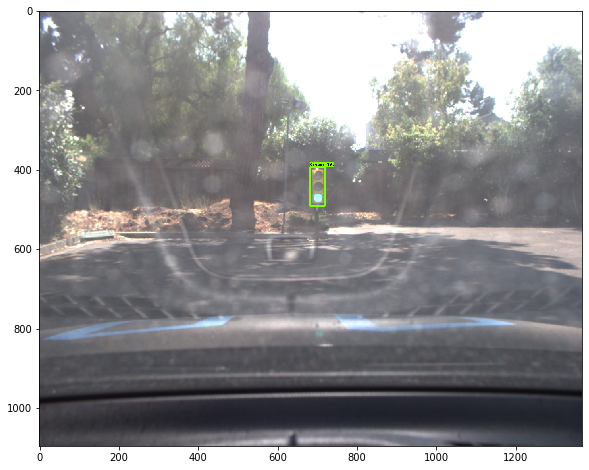

SCORES
[9.9281257e-01 2.5551915e-03 1.3518333e-03 3.5291910e-04 3.3593178e-04
 3.1235814e-04 2.3797154e-04 2.3499131e-04 1.9860268e-04 1.9672513e-04]
CLASSES
[2. 2. 1. 2. 2. 2. 2. 3. 1. 1.]


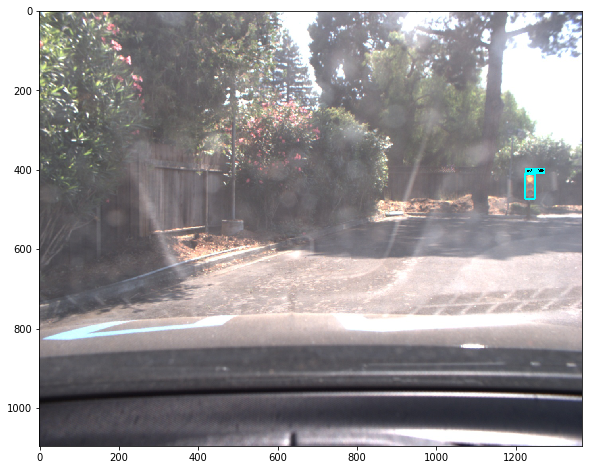

SCORES
[9.9842811e-01 5.1686168e-04 4.7931075e-04 3.9169192e-04 2.4765730e-04
 2.4735928e-04 2.3242831e-04 2.2569299e-04 2.2059679e-04 2.1728873e-04]
CLASSES
[2. 2. 2. 2. 2. 2. 3. 1. 2. 1.]


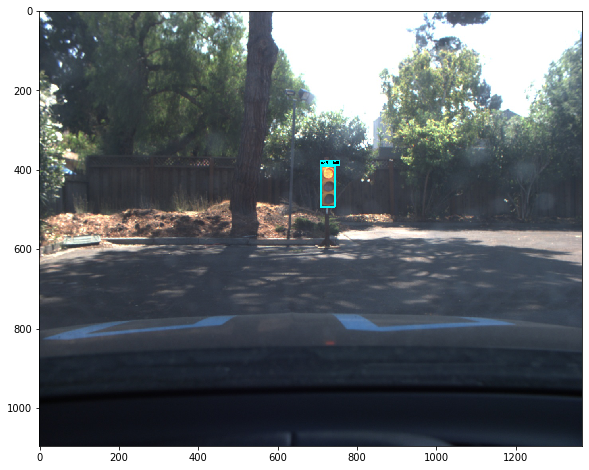

SCORES
[9.9770236e-01 3.4342110e-03 8.3470345e-04 7.8642368e-04 5.9682131e-04
 4.1514635e-04 3.3518672e-04 2.3230910e-04 2.1266937e-04 2.1180511e-04]
CLASSES
[2. 2. 2. 2. 3. 1. 2. 1. 3. 3.]


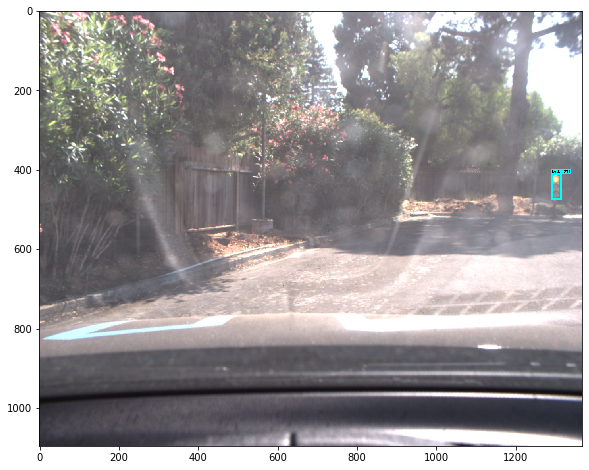

SCORES
[9.9590015e-01 5.1413774e-03 1.4802516e-03 1.0565519e-03 9.5835328e-04
 8.4078312e-04 8.0829859e-04 4.8920512e-04 4.5150518e-04 4.1824579e-04]
CLASSES
[2. 3. 1. 2. 3. 1. 2. 2. 1. 2.]


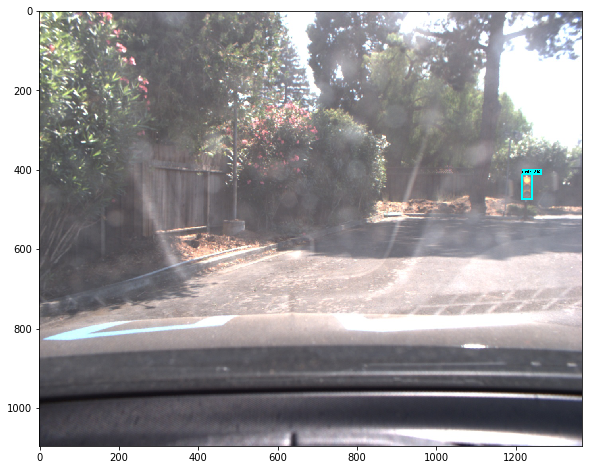

SCORES
[9.9965966e-01 4.1526556e-04 2.4601817e-04 2.3749471e-04 2.0587444e-04
 1.9550323e-04 1.7592311e-04 1.6945601e-04 1.6337633e-04 1.6075373e-04]
CLASSES
[2. 1. 2. 3. 1. 2. 2. 1. 1. 1.]


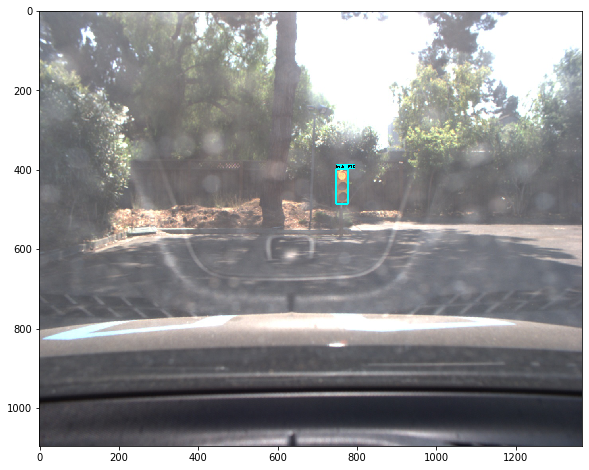

SCORES
[9.9987566e-01 3.9312243e-04 3.1831861e-04 3.0088425e-04 2.2053719e-04
 2.1308661e-04 2.0354986e-04 1.9717216e-04 1.9201636e-04 1.8858910e-04]
CLASSES
[2. 1. 2. 2. 2. 3. 1. 1. 3. 3.]


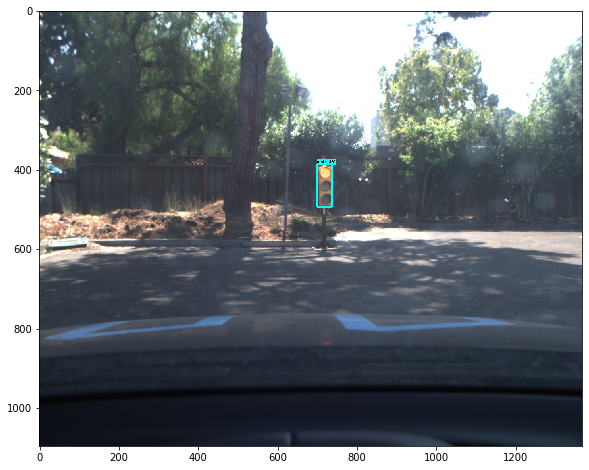

SCORES
[9.9512655e-01 4.5456290e-03 1.8267035e-03 2.2950768e-04 2.0015240e-04
 1.8510222e-04 1.6582012e-04 1.6552210e-04 1.5693903e-04 1.5106797e-04]
CLASSES
[2. 3. 1. 2. 1. 2. 3. 3. 1. 3.]


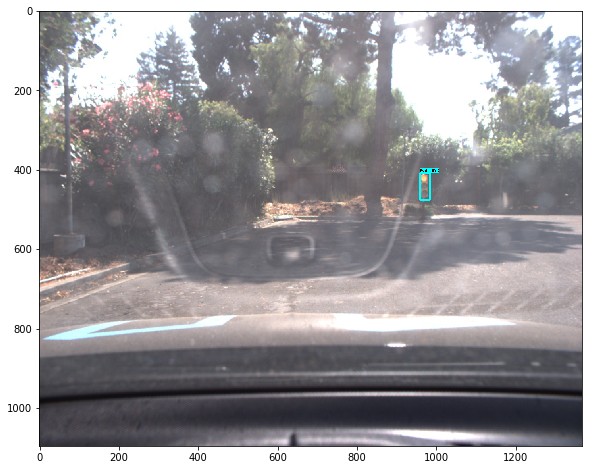

In [12]:
PATH_TO_IMGS = r'data/carla_test'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=5)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [13]:
PATH_TO_GRAPH = r'final_models/ssd_inc_v2_sim_finetune/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

SCORES
[0.5742659  0.57135767 0.16567159 0.01227221 0.00937876 0.0073095
 0.00712976 0.00570813 0.00460398 0.00388402]
CLASSES
[3. 3. 3. 1. 1. 2. 2. 1. 3. 1.]


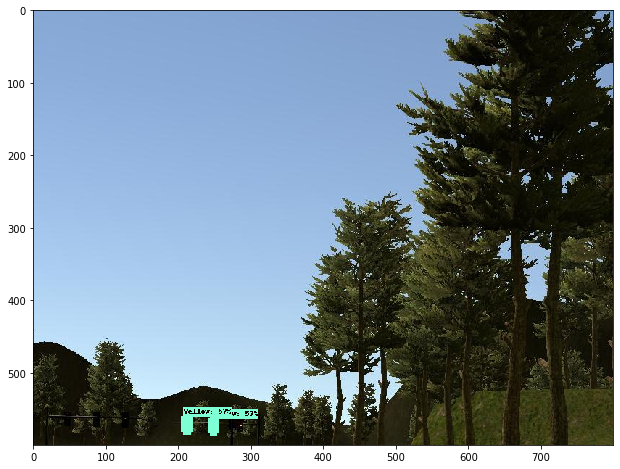

SCORES
[8.5357022e-01 6.1048436e-01 5.5805290e-01 1.0536015e-03 9.7310543e-04
 7.8576803e-04 6.9755316e-04 5.6123734e-04 5.0312281e-04 4.5934319e-04]
CLASSES
[2. 2. 2. 1. 1. 2. 2. 2. 1. 1.]


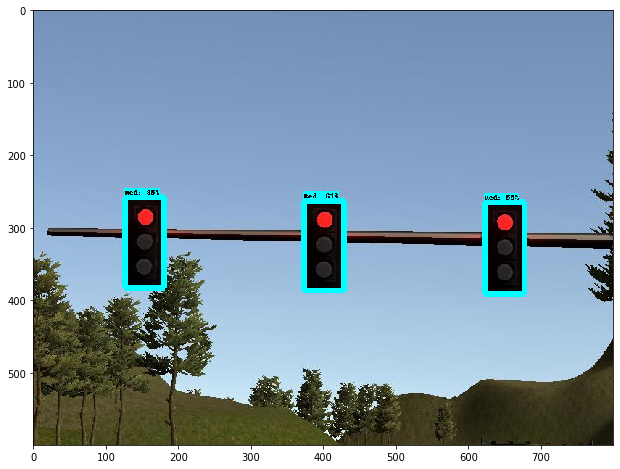

SCORES
[0.00281715 0.00172311 0.00138825 0.00132707 0.00060159 0.00044009
 0.00041667 0.00040212 0.00040153 0.00037697]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 3. 1. 3.]


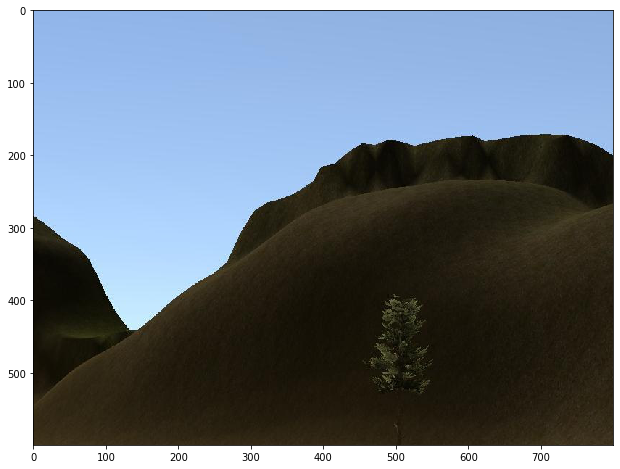

SCORES
[8.4085542e-01 5.7391667e-01 5.3665519e-01 1.1422932e-03 9.3808770e-04
 7.6070428e-04 7.0637465e-04 5.6079030e-04 5.3766370e-04 5.3337216e-04]
CLASSES
[2. 2. 2. 1. 2. 1. 2. 2. 1. 1.]


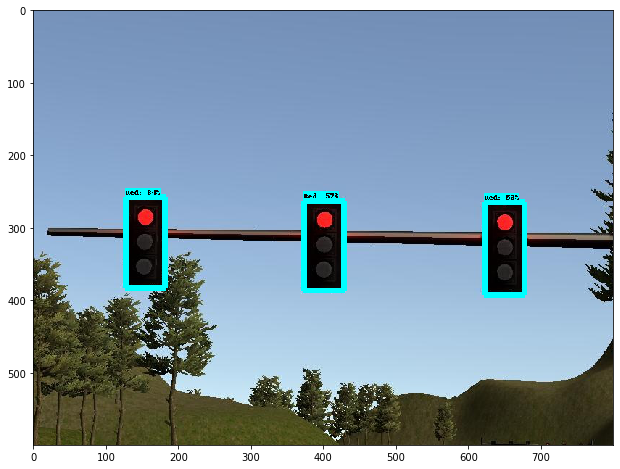

SCORES
[9.9971390e-01 9.9786115e-01 9.9610835e-01 1.6926229e-03 5.7083368e-04
 4.9167871e-04 4.1466951e-04 3.6570430e-04 3.0332804e-04 2.0593405e-04]
CLASSES
[2. 2. 2. 3. 3. 1. 3. 1. 2. 1.]


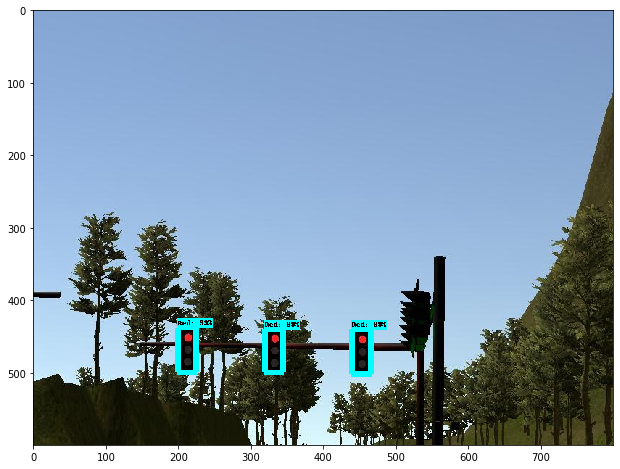

SCORES
[9.7493970e-01 9.5493501e-01 8.9433372e-01 1.3824999e-03 9.7769499e-04
 7.9730153e-04 7.2708726e-04 6.3914061e-04 6.0328841e-04 4.9546361e-04]
CLASSES
[1. 1. 1. 2. 1. 2. 2. 2. 3. 3.]


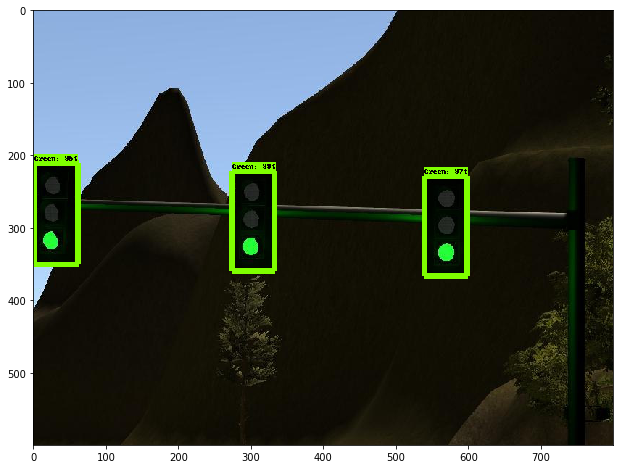

SCORES
[9.9947590e-01 9.9778646e-01 9.7683549e-01 5.2195787e-04 2.7999282e-04
 2.7039647e-04 2.3582578e-04 2.1404028e-04 2.1293759e-04 1.8846989e-04]
CLASSES
[2. 2. 2. 3. 1. 2. 2. 2. 2. 1.]


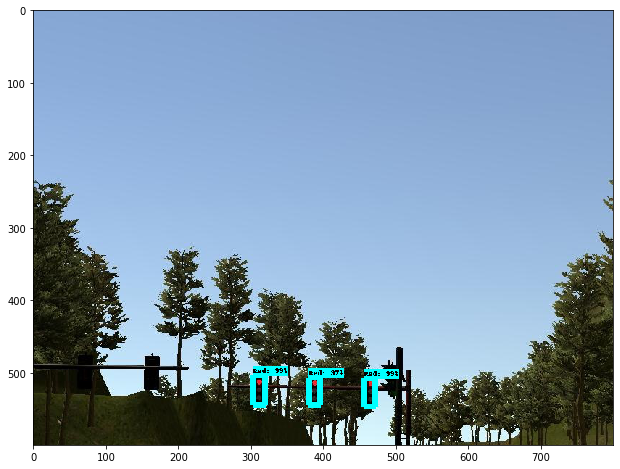

SCORES
[9.9262351e-01 9.8362714e-01 5.6183594e-01 1.6943216e-03 9.4795227e-04
 9.3960762e-04 8.8757277e-04 8.5765123e-04 8.2463026e-04 6.5091252e-04]
CLASSES
[2. 2. 2. 2. 3. 2. 1. 1. 3. 1.]


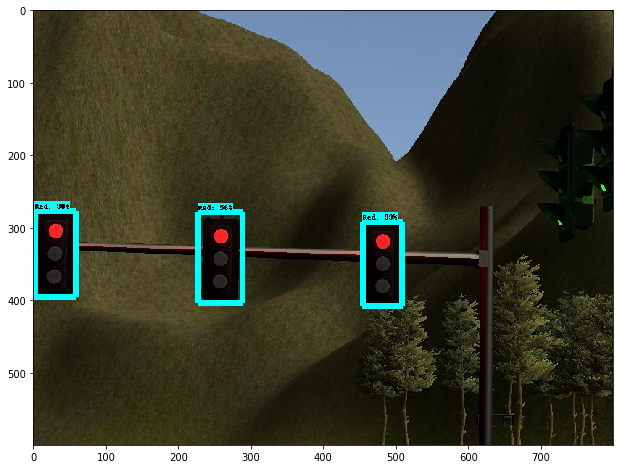

SCORES
[0.00140265 0.00101942 0.000763   0.0007357  0.00066617 0.0006353
 0.00057787 0.0005208  0.00046971 0.00042409]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


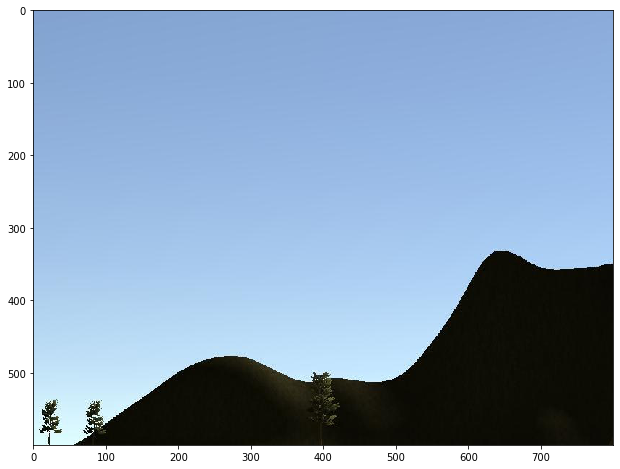

SCORES
[9.9367619e-01 9.8895383e-01 7.1859360e-04 5.5465102e-04 5.0172210e-04
 4.9340725e-04 4.8375130e-04 4.2939186e-04 3.9082766e-04 3.8772821e-04]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


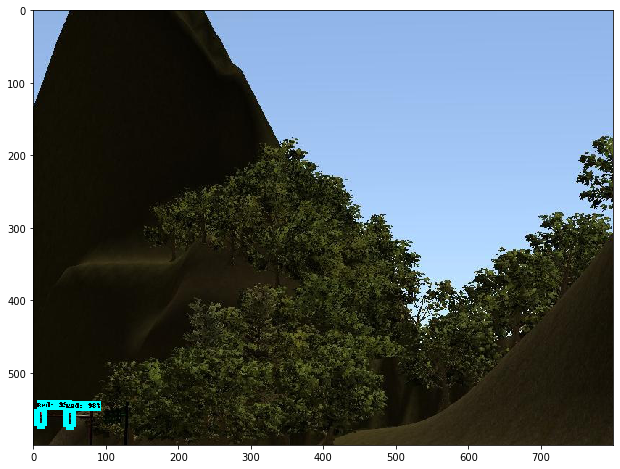

SCORES
[9.9974388e-01 9.9666810e-01 9.8505950e-01 2.6488304e-04 2.4145842e-04
 2.3436546e-04 2.1740794e-04 2.0891428e-04 2.0822883e-04 1.7282367e-04]
CLASSES
[2. 2. 2. 2. 3. 2. 2. 1. 2. 1.]


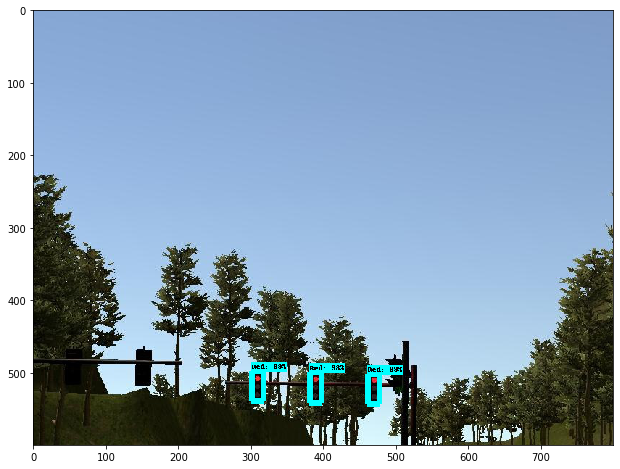

In [16]:

PATH_TO_IMGS = r'data/simulator_test'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break